# 7. KNN 

And again we are using the KNN to classify patient with and without diabetes.

In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Datasets/diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Then we get data prepared and then to send them into training.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set theme for plotting
sns.set_theme()

# Create feature matrix (all columns except 'Outcome')
X = data.drop('Outcome', axis=1).to_numpy()

# Create target value array
y = data['Outcome'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)



I would like to see which one of n-neighbors would be the best fit for the prediction. So I build a for-loop around the trianing to test it.

Accuracy for n_neighbors = 3: 0.67
Accuracy for n_neighbors = 4: 0.70
Accuracy for n_neighbors = 5: 0.70
Accuracy for n_neighbors = 6: 0.70
Accuracy for n_neighbors = 7: 0.69
Accuracy for n_neighbors = 8: 0.71
Accuracy for n_neighbors = 9: 0.71
Accuracy for n_neighbors = 10: 0.72
Accuracy for n_neighbors = 11: 0.71
Accuracy for n_neighbors = 12: 0.72
Accuracy for n_neighbors = 13: 0.72
Accuracy for n_neighbors = 14: 0.74
Accuracy for n_neighbors = 15: 0.72
Accuracy for n_neighbors = 16: 0.71
Accuracy for n_neighbors = 17: 0.70
Accuracy for n_neighbors = 18: 0.72
Accuracy for n_neighbors = 19: 0.71


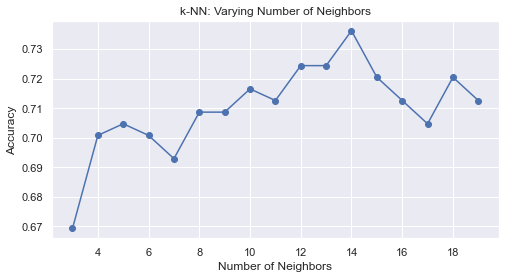

In [20]:

# Range of 'n_neighbors' to evaluate
neighbors_settings = range(3, 20)

# List to store the accuracies for each value of n_neighbors
accuracies = []

for n_neighbors in neighbors_settings:
    # Instantiate the KNN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy for n_neighbors = {n_neighbors}: {accuracy:.2f}")

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(neighbors_settings, accuracies, marker='o')
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

It seems like 14 neighbors have the best accuracy. Thus we train our model that have 14 neighbors.

In [21]:
clf = KNeighborsClassifier(n_neighbors=14)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Optionally, you can now evaluate the model with X_test and y_test
# For example, to check the model's accuracy:
accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7362204724409449


After that, for the sake of simplicity, I pick Glucose and BMI which seems the most relevant two to the diabetes and plot the region.

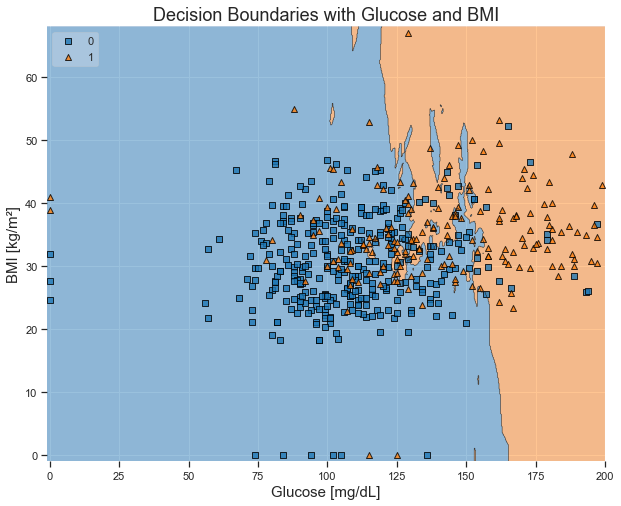

In [22]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Select two most crucial variables, here 'Glucose' and 'BMI'
X2 = data[['Glucose', 'BMI']].values
y2 = data['Outcome'].values

# Split the dataset into training and testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=13)

# Train a new classifier using only the two selected features
clf2 = KNeighborsClassifier(n_neighbors=14)
clf2.fit(X_train2, y_train2)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train2, y_train2, clf=clf2, legend=2)
plt.xlabel('Glucose [mg/dL]', fontsize=15)
plt.ylabel('BMI [kg/m²]', fontsize=15)
plt.title('Decision Boundaries with Glucose and BMI', fontsize=18)
plt.show()

Confusion Matrix:
[[145  15]
 [ 52  42]]



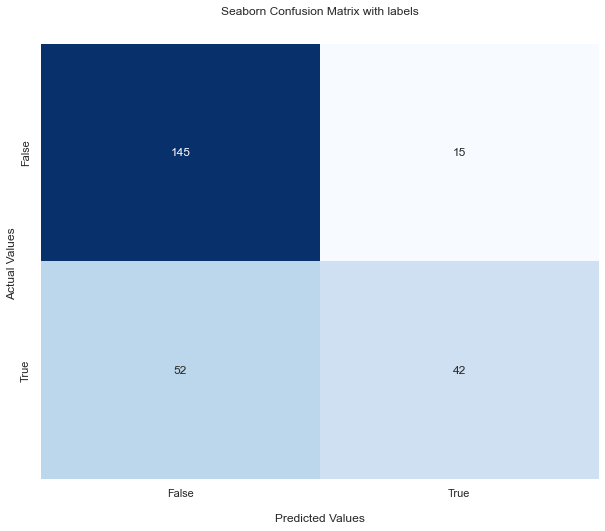

In [24]:
from sklearn.metrics import confusion_matrix

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"Confusion Matrix:\n{cf_matrix}\n")

# View the confusion matrix using the seaborn package
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)  # 'fmt' argument is to avoid scientific notation

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order here, it should be False and True or [0,1]
ax.xaxis.set_ticklabels(['False', 'True'])  # Adjust these based on your data
ax.yaxis.set_ticklabels(['False', 'True'])  # Adjust these based on your data

# Display the visualization of the Confusion Matrix.
plt.show()